<div style="display: flex; align-items: center;">
   <div style=" display: flex; gap: 20px;">
      <img src="https://gifdb.com/images/high/fish-swimming-in-nature-ov6l2h50gna5vphv.gif" alt="Small Image" style="width: 600px; height: auto;">
   </div>
    
[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fgifdb.com%2Fgif%2Ffish-swimming-in-nature-ov6l2h50gna5vphv.html&psig=AOvVaw3fOl4RWqcTqAZRCyLulnx6&ust=1692842271433000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCJi3nYTX8YADFQAAAAAdAAAAABBB)

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Introduction</p></div>

Welcome to the Fish Head and Tail Detection Dataset, an invaluable resource designed to propel research and experimentation in the field of fish head and tail detection. This dataset places a distinct emphasis on the identification of fish heads and tails, offering a comprehensive collection of 200 meticulously annotated images to facilitate advanced exploration and analysis.


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Significance of Annotation</p></div>


The meticulous annotation of fish head and tail positions within this dataset holds profound significance. It empowers researchers and developers to delve into pioneering studies centered around object detection, aiding in the creation of robust and accurate detection models. The annotations offer a foundational basis for training and testing models that can identify these critical parts of fish anatomy.

By providing both annotated images and precise label coordinates, this dataset fosters an environment conducive to the development and validation of cutting-edge detection algorithms. This opens doors to advancements in marine biology, environmental monitoring, and fisheries management, where the identification of fish head and tail components holds immense value.

In the subsequent sections, we will delve deeper into the dataset's composition, annotation methodology, and practical applications, enabling you to harness the potential of fish head and tail detection for various domains of study and innovation.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Import Libraries</p></div>

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Data Preparation</p></div>

In [27]:
# Data Preparation
training_dir = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training'  # Replace with actual path
image_filenames = ['IMG_20190930_070337.jpg', 'IMG_20190930_070402.jpg', 'IMG_20190930_070438.jpg']
image_paths = [os.path.join(training_dir, filename) for filename in image_filenames]


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Display sample images</p></div>

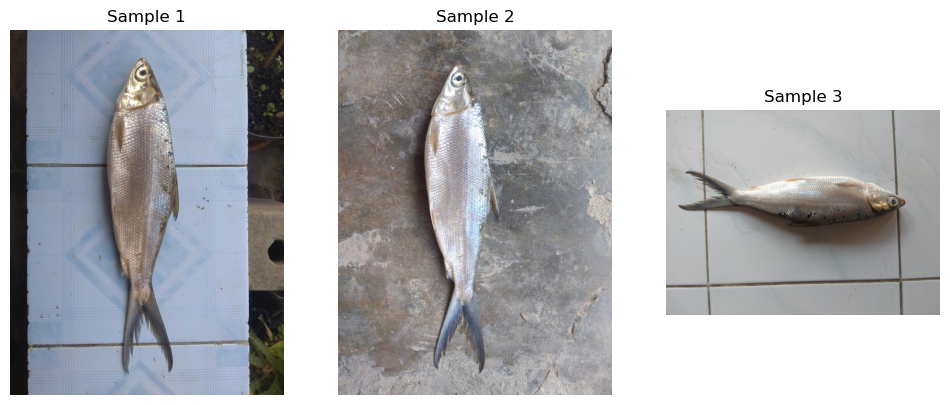

In [28]:
# Display sample images
plt.figure(figsize=(12, 6))
for i, img_path in enumerate(image_paths, 1):
    img = cv2.imread(img_path)
    plt.subplot(1, len(image_paths), i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Sample {i}')
plt.show()

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Annotation Format</p></div>

The annotation files in this dataset, such as TXT files, adhere to a specific format that encodes essential information about the fish head and tail positions. Each line in the annotation file represents an annotated instance of a fish head or tail within the corresponding image.

### Field Explanation:

- **Class ID:** An integer value representing the class of the annotated object. In this case, 0 signifies "Fish Head," and 1 signifies "Fish Tail."
- **X-Center:** The normalized x-coordinate of the center of the annotated object within the image.
- **Y-Center:** The normalized y-coordinate of the center of the annotated object within the image.
- **Width:** The normalized width of the bounding box around the annotated object.
- **Height:** The normalized height of the bounding box around the annotated object.

The processes the annotation content and extracts the values of these fields. It converts the class ID to human-readable class names ("Fish Head" or "Fish Tail") for better interpretation. The processed information is then printed to the console, providing insight into each annotation's details.

To fully grasp the significance of the annotations and their impact on object detection tasks, understanding this format is crucial. These annotations serve as the reference data used to train object detection models, enabling the models to learn how to identify fish head and tail components accurately.

In [4]:
import os

# Path to the dataset directory
dataset_dir = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1'

# Function to process annotation content
def process_annotation(annotation_content):
    annotation_lines = annotation_content.strip().split('\n')
    
    for line in annotation_lines:
        parts = line.split()
        if len(parts) < 5:
            print("Invalid annotation line:", line)
            continue
        
        class_id = int(parts[0])
        x_center = float(parts[1])
        y_center = float(parts[2])
        width = float(parts[3])
        height = float(parts[4])

        if class_id == 0:
            class_name = "Fish Head"
        elif class_id == 1:
            class_name = "Fish Tail"
        else:
            class_name = "Unknown"

        print(f"Class: {class_name}, Center (x, y): ({x_center}, {y_center}), Width: {width}, Height: {height}")

# Iterate through training annotation files
train_dir = os.path.join(dataset_dir, 'Training')
train_anno_files = [file for file in os.listdir(train_dir) if file.endswith('.txt')]

print("Processing training annotations:")
for anno_file in train_anno_files:
    anno_path = os.path.join(train_dir, anno_file)
    with open(anno_path, 'r') as f:
        annotation_content = f.read()
        print(f"Processing annotation in {anno_file}:")
        process_annotation(annotation_content)
    print()

# Iterate through testing annotation files
test_dir = os.path.join(dataset_dir, 'Testing')
test_anno_files = [file for file in os.listdir(test_dir) if file.endswith('.txt')]

print("Processing testing annotations:")
for anno_file in test_anno_files:
    anno_path = os.path.join(test_dir, anno_file)
    with open(anno_path, 'r') as f:
        annotation_content = f.read()
        print(f"Processing annotation in {anno_file}:")
        process_annotation(annotation_content)
    print()


Processing training annotations:
Processing annotation in IMG_20191110_081306.txt:
Class: Fish Head, Center (x, y): (0.53766, 0.21875), Width: 0.149038, Height: 0.149038
Class: Fish Tail, Center (x, y): (0.413462, 0.829928), Width: 0.24359, Height: 0.246394

Processing annotation in IMG_20191111_054156.txt:
Class: Fish Head, Center (x, y): (0.469551, 0.586538), Width: 0.227564, Height: 0.163462
Class: Fish Head, Center (x, y): (0.428686, 0.858173), Width: 0.213141, Height: 0.146635
Class: Fish Head, Center (x, y): (0.604167, 0.311298), Width: 0.182692, Height: 0.127404
Class: Fish Head, Center (x, y): (0.694712, 0.388221), Width: 0.203526, Height: 0.098558
Class: Fish Head, Center (x, y): (0.768429, 0.512019), Width: 0.197115, Height: 0.149038
Class: Fish Head, Center (x, y): (0.801282, 0.606971), Width: 0.157051, Height: 0.129808
Class: Fish Head, Center (x, y): (0.724359, 0.760216), Width: 0.208333, Height: 0.140625
Class: Fish Tail, Center (x, y): (0.14984, 0.215144), Width: 0.20032

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Annotation Process Overview</p></div>

Annotating fish head and tail positions in images involves a meticulous process that brings precision to object detection tasks. Skilled annotators meticulously outline the boundaries of fish heads and tails, accurately marking their positions within each image. This process generates annotated data that serves as the foundation for training and evaluating object detection models.

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Importance of Accurate Annotations</p></div>

The accuracy of annotations is pivotal for the success of object detection tasks. Precise annotations provide the ground truth data required for training models to recognize and locate fish head and tail components with high reliability. Accurate annotations lead to the development of robust models capable of making informed decisions, contributing to the advancement of diverse fields, including marine biology, conservation, and aquatic research.

Inaccurate annotations could lead to suboptimal model performance and compromised detection capabilities. Therefore, ensuring the utmost accuracy in annotation practices is essential to unlock the full potential of object detection algorithms. The process empowers researchers to create models that can differentiate between fish heads, tails, and other objects with confidence, facilitating deeper insights and applications in various domains.

,Class ID,x_center,y_center,width,height
0,0,0.537660,0.218750,0.149038,0.149038
1,1,0.413462,0.829928,0.243590,0.246394


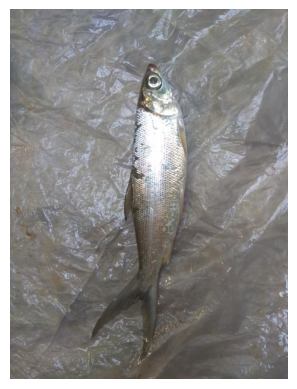

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1'

# Function to process annotation content
def process_annotation(annotation_content):
    annotation_lines = annotation_content.strip().split('\n')
    
    data = [line.split() for line in annotation_lines]
    box = pd.DataFrame(data, columns=['Class ID', 'x_center', 'y_center', 'width', 'height'])
    
    return box

# Iterate through training annotation files
train_dir = os.path.join(dataset_dir, 'Training')
train_anno_files = [file for file in os.listdir(train_dir) if file.endswith('.txt')]

if train_anno_files:
    anno_file_index = 0  # Change this index to the desired annotation file you want to process
    anno_file = train_anno_files[anno_file_index]
    anno_path = os.path.join(train_dir, anno_file)
    img_path = anno_path.replace('.txt', '.jpg')

    with open(anno_path, 'r') as f:
        annotation_content = f.read()
        annotation_box = process_annotation(annotation_content)
        
    # Display the table
    display(annotation_box)
    
    # Display the image
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No training annotation files found.")


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Annotated Dataset Exploration</p></div>

* Showcase sample annotated images from the dataset.
* Display the images with bounding boxes around fish head and tail annotations.

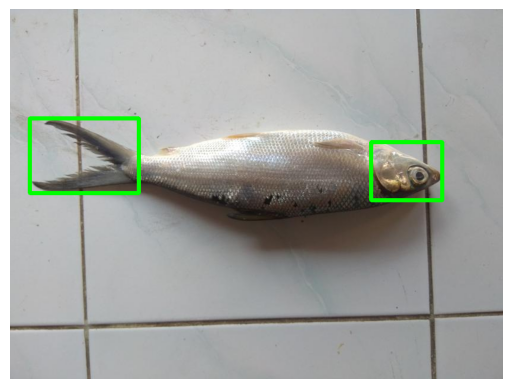

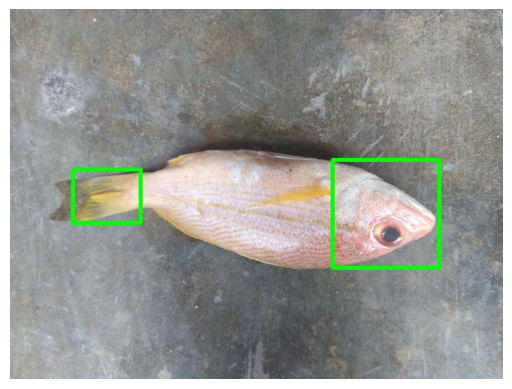

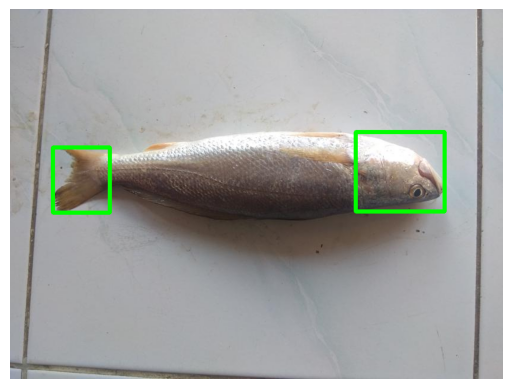

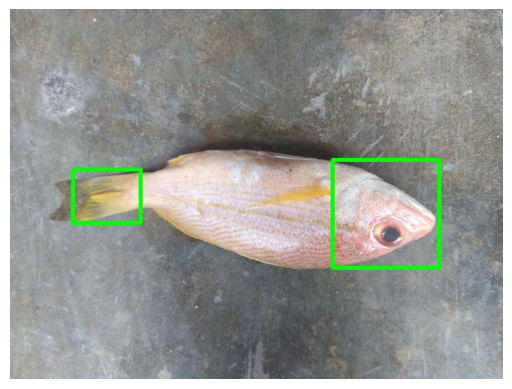

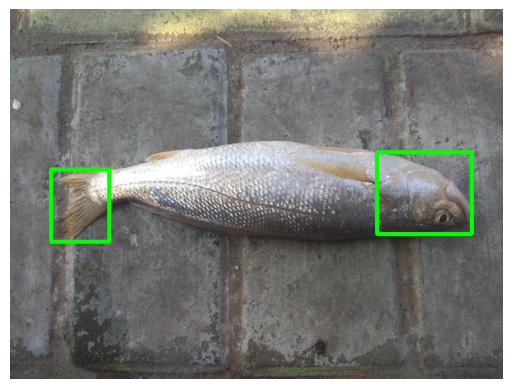

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def draw_box(anno_path):
    img_path = anno_path.replace('.txt', '.jpg')
    with open(anno_path, 'r') as file:
        text = file.read().strip().split("\n")
    data = [line.split() for line in text]
    box = pd.DataFrame(data)
    box = box.astype(float)
    image = plt.imread(img_path)
    H, W = image.shape[0], image.shape[1]
    
    for i in range(len(box)):
        label = int(box.loc[i, 0])
        xc = int(box.loc[i, 1] * W)
        yc = int(box.loc[i, 2] * H)
        w = int(box.loc[i, 3] * W) 
        h = int(box.loc[i, 4] * H)
        y1 = yc - int(0.5 * h)
        y2 = yc + int(0.5 * h)
        x1 = xc - int(0.5 * w)
        x2 = xc + int(0.5 * w)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)  # green
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
#anno_path = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20190930_070438.txt'  
#draw_box(anno_path)

# Example 1
anno_path_1 = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20190930_070438.txt' 
draw_box(anno_path_1)

# Example 2
anno_path_2 = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20191014_064617.txt'
draw_box(anno_path_2)

# Example 3
anno_path_3 = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20191014_070938.txt'
draw_box(anno_path_3)

# Example 4
anno_path_4 = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20191014_064617.txt'
draw_box(anno_path_4)

# Example 5
anno_path_5 = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20191014_071020.txt'
draw_box(anno_path_5)


In [36]:
import cv2

def preprocess_image(image_path, target_size):
    # Load image and resize to target size
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    
    # Normalize pixel values to [0, 1] range
    image = image.astype('float32') / 255.0
    
    return image

# Define target image size for the model
target_size = (224, 224)

# Example usage for preprocessing an image
image_path = '/kaggle/input/fish-head-and-tail-detection-dataset/7m2yzmpcft-1/Training/IMG_20190930_070337.jpg'  
preprocessed_image = preprocess_image(image_path, target_size)

#preprocessed_image

# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#40E0D0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Annotation Challenges</p></div>

Annotating fish head and tail components in images can present various challenges that impact the accuracy and reliability of object detection models. These challenges stem from real-world scenarios and diverse image characteristics. Below, we address some common challenges and issues that annotators might encounter while working with the Fish Head and Tail Detection Dataset:

- **Occlusion:** Fish in natural environments often overlap or occlude each other, making it challenging to accurately annotate individual fish heads and tails. Annotators may struggle to discern obscured parts, leading to incomplete annotations.

- **Varying Poses:** Fish exhibit diverse poses and orientations, causing variations in the appearance of their heads and tails. Annotating these variations accurately requires annotators to account for the different angles from which the fish are captured.

- **Complex Backgrounds:** Fish are often found in diverse aquatic environments with complex backgrounds. The presence of underwater vegetation, rocks, and other elements can make it difficult to differentiate fish components from the background, leading to inaccurate annotations.

- **Size Variation:** Fish species can vary significantly in size, resulting in different sizes of fish heads and tails. Accurate annotation requires annotators to adjust bounding boxes according to fish size while maintaining proportionality.

- **Annotation Consistency:** Different annotators may interpret annotation guidelines differently, leading to inconsistencies in bounding box placement and size. Ensuring annotation consistency across images is vital for reliable model training.

- **Anatomy Variability:** Fish head and tail anatomy can vary across species. Annotators need to understand the distinct characteristics of different fish species to accurately annotate their components.

- **Partial Annotating:** In cases where only a portion of the fish is visible within the image frame, annotators must determine whether to annotate the visible components or exclude such instances.

- **Scale Variation:** Images in the dataset might exhibit scale variations due to factors like camera distance. Annotators must be attentive to maintaining accurate proportions in bounding box annotations.

Addressing these challenges requires careful training of annotators, clear annotation guidelines, and continuous quality checks. It's important to acknowledge these challenges when interpreting and utilizing the annotations for training object detection models.